### File  reading 

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import  numpy as  np

In [6]:
path =  r"C:\Users\admin\Downloads\train.csv"

In [7]:
df  =  pd.read_csv(path)

## Basic data quality checks

In [8]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [9]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [10]:
df.columns  =  ['id', 'Product ID', 'Type', 'Air temperature',
       'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  object 
 2   Type                 136429 non-null  object 
 3   Air temperature      136429 non-null  float64
 4   Process temperature  136429 non-null  float64
 5   Rotational speed     136429 non-null  int64  
 6   Torque               136429 non-null  float64
 7   Tool wear            136429 non-null  int64  
 8   Machine failure      136429 non-null  int64  
 9   TWF                  136429 non-null  int64  
 10  HDF                  136429 non-null  int64  
 11  PWF                  136429 non-null  int64  
 12  OSF                  136429 non-null  int64  
 13  RNF                  136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 14.6+ MB


In [12]:
df.isnull().sum()

id                     0
Product ID             0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Machine failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

##  seperate x  and y

In [15]:
x  =  df.drop(['id', 'Product ID',  "Machine failure"]  , axis =  1)
y  =  df['Machine failure']

In [16]:
x.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

#### seperate cat and  num data

In [18]:
cat  =  x.columns[x.dtypes  ==  'object']
num  =  x.columns[x.dtypes  !=  'object']

In [19]:
print(cat)
print(num)

Index(['Type'], dtype='object')
Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [20]:
x['Type'].isnull().sum()

np.int64(0)

### create  pipeline

In [21]:
from sklearn.pipeline  import Pipeline
from sklearn.compose  import ColumnTransformer
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing  import StandardScaler  , OrdinalEncoder

In [22]:
num_pipeline  =  Pipeline(steps   =  [('imputer' ,SimpleImputer(strategy =  'mean' ) ),
                             ('scaler' , StandardScaler())])
cat_pipeline =  Pipeline(steps   =  [('imputer' ,SimpleImputer(strategy =  'most_frequent' ) ),
                             ('encoder' , OrdinalEncoder())])

In [23]:
pre  =  ColumnTransformer([('num' , num_pipeline ,  num ) ,  ('cat' , cat_pipeline  , cat)])

In [24]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [25]:
##  apply to data
x_scaled  =  pre.fit_transform(x)


In [26]:
x_scaled

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]], shape=(136429, 11))

In [27]:
x_scaled  =  pd.DataFrame(x_scaled  ,  columns  =  x.columns)

In [28]:
x_scaled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


#### feature  selection  by  mutual_info_score

In [29]:
from  sklearn.feature_selection import mutual_info_classif
mi  =  mutual_info_classif(x_scaled  ,  y  ,  n_jobs  =  -1)

In [30]:
mi

array([0.00531162, 0.00178622, 0.01897704, 0.0202862 , 0.00718074,
       0.00830231, 0.02437245, 0.01070922, 0.01944577, 0.00151005,
       0.01121406])

In [31]:
mi  =  pd.Series(mi)

In [32]:
mi.index  =  x_scaled.columns

In [33]:
mi =  mi.sort_values()

In [34]:
mi

OSF                    0.001510
Air temperature        0.001786
Type                   0.005312
Torque                 0.007181
Tool wear              0.008302
HDF                    0.010709
RNF                    0.011214
Process temperature    0.018977
PWF                    0.019446
Rotational speed       0.020286
TWF                    0.024372
dtype: float64

<Axes: >

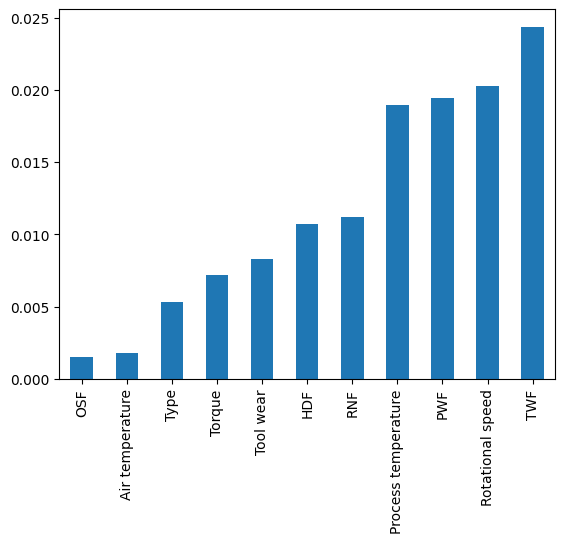

In [35]:
mi.plot(kind =  'bar')

In [36]:
len(mi)

11

In [37]:
len(x_scaled.columns)

11

### train test  split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train ,  x_test  ,  y_train ,  y_test  =  train_test_split(x_scaled  ,  y ,  test_size  =  0.2  ,  random_state  =  3)

In [40]:
print(x_train.shape , y_train.shape)
print(x_test.shape  ,  y_test.shape)

(109143, 11) (109143,)
(27286, 11) (27286,)


In [41]:
y_train.value_counts()

Machine failure
0    107418
1      1725
Name: count, dtype: int64

In [42]:
y_test.value_counts()

Machine failure
0    26863
1      423
Name: count, dtype: int64

In [43]:
y.value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

## model fitting  

In [44]:
from sklearn.linear_model  import LogisticRegression  
from sklearn.tree  import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  ,  GradientBoostingClassifier
import xgboost  as xgb
from xgboost  import XGBClassifier
from sklearn.svm import SVC 
from sklearn.neighbors  import KNeighborsClassifier


## Loistic  regression model  fitting

In [45]:
logreg  =  LogisticRegression()
logreg.fit(x_train  ,  y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
logreg.score(x_train  ,  y_train)

0.9961701620809397

In [47]:
logreg.score(x_test  ,  y_test)

0.9962251704170637

In [48]:
train_pred  =  logreg.predict(x_train)
test_pred  =  logreg.predict(x_test)

In [49]:
from sklearn.metrics  import classification_report  ,  f1_score  , confusion_matrix

In [50]:
print(classification_report(y_train , train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107418
           1       0.99      0.76      0.86      1725

    accuracy                           1.00    109143
   macro avg       0.99      0.88      0.93    109143
weighted avg       1.00      1.00      1.00    109143



In [51]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26863
           1       0.99      0.76      0.86       423

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [52]:
f1_score(y_train, train_pred)

0.8631303208906352

In [53]:
f1_score(y_test  ,  test_pred)

0.8624833110814419

In [54]:
cf  =  confusion_matrix(y_train  , train_pred)
cf

array([[107407,     11],
       [   407,   1318]])

In [55]:
logreg.classes_

array([0, 1])

<Axes: >

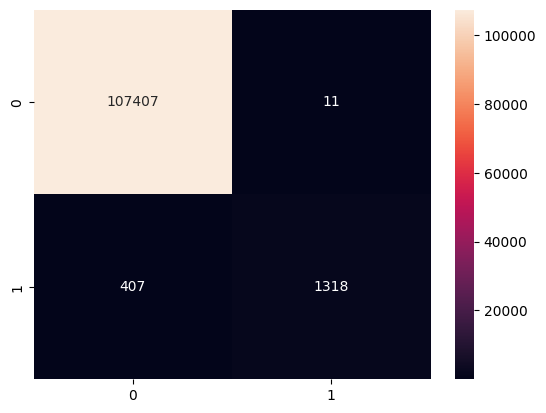

In [56]:
sns.heatmap(cf , annot  = True  , fmt =  'd' , xticklabels= True  ,  yticklabels= True  )

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
def  Evaluation( x_train  , y_train  , x_test  ,  y_test):

  data  =  {'LR'  :  LogisticRegression(),
          "DT" : DecisionTreeClassifier(max_depth  =  5 ,  min_samples_split=10 ),
          "RF" : RandomForestClassifier(max_depth  =  5 ,  min_samples_split=10 ) ,
          "GB" : GradientBoostingClassifier( ) ,
          'XGB' : XGBClassifier() ,
          "KNN" : KNeighborsClassifier(n_neighbors= 7) ,
          "SVM" : SVC()}
  for  name  ,  model in  data.items():
    model.fit(x_train ,  y_train  )
    train_pred  =  model.predict(x_train)
    test_pred  =  model.predict(x_test)
    f1_tr  =  f1_score(y_train  ,  train_pred)
    f1_ts  =  f1_score(y_test  ,  test_pred)
    cv  = cross_val_score( estimator  =  model , X  =  x_train  ,  y  = y_train  ,  cv  =  5  ,  n_jobs= -1)
    CR_tr  =  classification_report(y_train  , train_pred  , )
    cf_tr  =  confusion_matrix(y_train  ,  train_pred)
    CR_test  =  classification_report(y_test  ,  test_pred)
    cf_test  =  confusion_matrix(y_test  , test_pred)

    print(f"{name}")
    print(f"Train f1  --> {f1_tr}")
    print(f"Test f1  -- > {f1_ts}")
    print(f"Cv  -->  {cv}")
    print(cv.mean())
    print(f'CR_train -->  {CR_tr}' )
    sns.heatmap(cf_tr , annot  = True  , fmt =  'd' , xticklabels= True  ,  yticklabels= True  )
    
    print(f"CR_test  --> {CR_test}")
    sns.heatmap(cf_test , annot  = True  , fmt =  'd' , xticklabels= True  ,  yticklabels= True  )
    print()
    print('-------------------------------------------------')
    print()


LR
Train f1  --> 0.8631303208906352
Test f1  -- > 0.8624833110814419
Cv  -->  [0.99647258 0.99633515 0.99615191 0.99551035 0.99633498]
0.996160995422019
CR_train -->                precision    recall  f1-score   support

           0       1.00      1.00      1.00    107418
           1       0.99      0.76      0.86      1725

    accuracy                           1.00    109143
   macro avg       0.99      0.88      0.93    109143
weighted avg       1.00      1.00      1.00    109143

CR_test  -->               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26863
           1       0.99      0.76      0.86       423

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286


-------------------------------------------------

DT
Train f1  --> 0.8639790232710587
Test f1  -- > 0.8594377510040161
Cv  -->  [0.99647258 0.99628934 0.99615191 0.

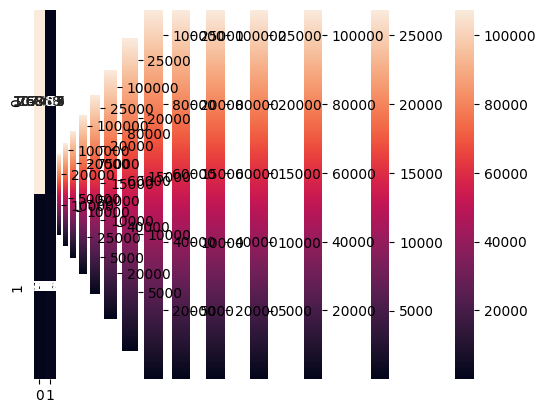

In [59]:
Evaluation(x_train ,  y_train,  x_test  ,  y_test)

- from  above  all  models  performance of  gradient boosting  giving  good performance so  use  this for  future  prediction

In [60]:
gb  =  GradientBoostingClassifier()
gb.fit(x_train  ,  y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [61]:
gb.score(x_train ,  y_train)

0.9965000045811458

In [62]:
gb.score(x_test , y_test)

0.9962251704170637

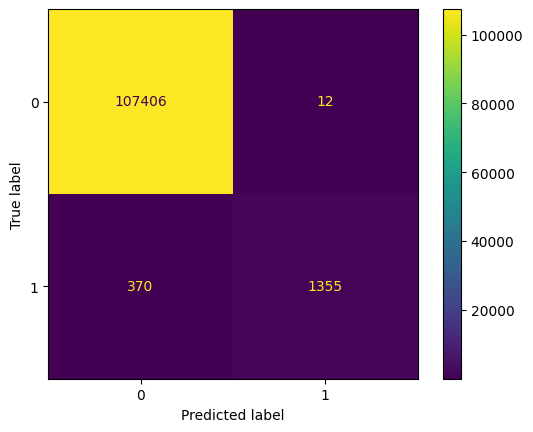

In [63]:
from sklearn.metrics  import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gb  ,  x_train , y_train)

## use unseen data  for  prediction of target  

In [64]:
path  =  r"C:\Users\admin\Downloads\test.csv"

In [72]:
sample  =  pd.read_csv(path)

In [73]:
sample.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [74]:
sample.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [75]:
sample  =  sample.drop(['id',   'Product ID'] , axis  = 1)

In [76]:
sample.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [77]:
sample.columns  =  x.columns

In [78]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [95]:
sample_scaled  = pre.transform(sample)

In [96]:
sample_scaled  = pd.DataFrame(sample_scaled  ,  columns  =  x.columns)

In [97]:
sample_scaled.shape

(90954, 11)

In [98]:
sample_scaled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


In [99]:
x_train.shape

(109143, 11)

In [100]:
x_train.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [101]:
sample_scaled.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [102]:
sample_scaled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


In [103]:
pred  = gb.predict(sample_scaled)

In [104]:
pred

array([0, 0, 0, ..., 0, 0, 0], shape=(90954,))

In [105]:
np.unique(pred)

array([0, 1])